<center>Заметка 1.  Базовые понятия машинного обучения, регрессия.</center>
<center>курса <q>Введение в машинное обучение</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.13</center>

<center>Аннотация</center>
<p>
Вводятся базовые элементы пакета линейной алгебры (Numpy) относящейся к питону (Python версии 3.xx). Конкретно речь идет о алгебре и, соответственно, линейной регрессии.
Последнее, в частности, используется для ввода ключевых понятий из машинного обучения: выборка, обучающее множество, тестовое/валидационное множество, поиск "оптимального" решения и регуляризация. Уровни значимости (F-статистика) при построении регрессий (statmodels). 
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<h1>Приближение</h1>

<h2>Линейная</h2>

<h3>Формирование данных</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy.linalg as alg

# Рассмотрим случай полиномов. Тонее на них мы изучим другое важное поянтие машинного обучения. Регулиризация.
import numpy.polynomial.polynomial as poly
#%matplotlib inline

In [2]:
# Для начала случайно сгенерируем точки в которых будет вычислена функция.
np.random.uniform(10, 20, 5)  # Создаем матрицу равномерных распределений. Первые два числа казывают диапазон.

array([12.42108043, 17.20488768, 12.54038956, 14.49724953, 14.40936048])

In [3]:
x = np.random.uniform( 3, 10, 10 ) # 10 точек на отрезке [3, 10]
x

array([8.65726368, 3.23453037, 5.20747842, 8.94405975, 4.30006596,
       7.43629982, 9.27328105, 9.18722546, 6.30347918, 5.75695192])

In [4]:
x.shape # Это действительно массив из 10 чисел.

(10,)

In [5]:
y = x * 2 - 15 # Вычисляем значение в каждой из точек. Функция линейная.
y

array([ 2.31452736, -8.53093927, -4.58504317,  2.8881195 , -6.39986807,
       -0.12740037,  3.54656209,  3.37445092, -2.39304164, -3.48609616])

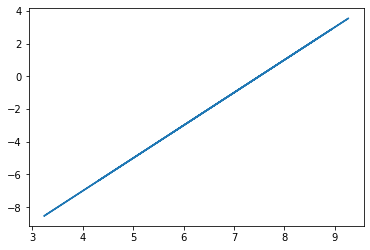

In [6]:
plt.plot( x, y );

In [7]:
yy = y + np.random.randn(10) # Добавим шум к каждому значению (измерению)

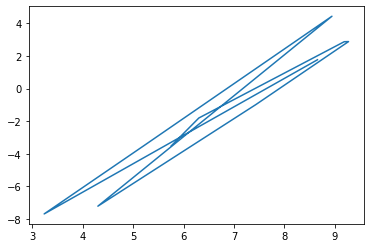

In [8]:
plt.plot( x, yy ); # Кривая как-то странно выглядит.

In [9]:
xx = np.sort( x ) # Дело в том, что необходимо отсортировать числа по оси x.
yy = xx * 2 - 15 + np.random.randn(10) # Теперь заново вычисляем.

In [10]:
yy.shape, x.shape # Массивы соответсвуют друг другу по размеру.

((10,), (10,))

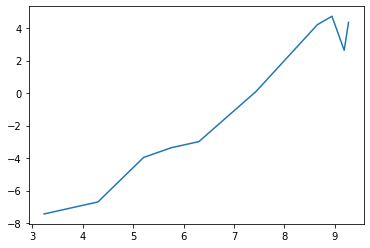

In [11]:
plt.plot( xx, yy );

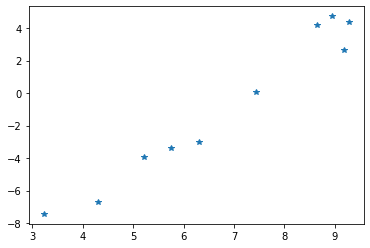

In [12]:
plt.plot( xx, yy, '*' );

Упр. Построить аналог для параболы, т.е. немного подвинуть данные лажащие на параболе.

<h3>Линейная регрессия</h3>

см заметку по питону:
[массивы и графики](http://машинноезрение.рф/pyth/2019-2020/pyth_08_array.html)

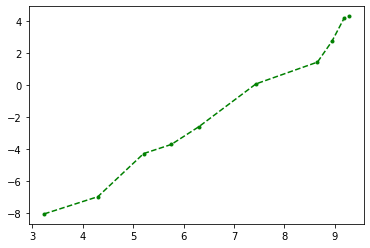

In [13]:
yy = xx * 2 - 15 + np.random.randn(10)/2 # Тоже самое но с меньшим шумом.
plt.plot( xx, yy, 'g.--'); # Цвет зеленый, соединения пунктиром, точки маленькие.

<b>reshape</b>

In [14]:
qq = np.array([1,2,3,4,5,6,7,8,9])
qq

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
# Меняем форму.
qq.reshape(3,3) # 9 = 3 * 3
# Такое же количество элементов.

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [16]:
qq # Исходный массив не изменился.

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
# Если оличество элементов не будет совпадать.
qq.reshape(2,5) # 9 != 2 * 5

ValueError: cannot reshape array of size 9 into shape (2,5)

In [18]:
# Вектор столбец.
qq.reshape(9,1) # 9 - строк,
# 1 - колонка.

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [19]:
del qq

<b>дальше</b>

In [20]:
# Превращяем массив в вектор столбец,
q=xx.reshape(10,1)
q # т.е. массив массивов (из одного элемента).

array([[3.23453037],
       [4.30006596],
       [5.20747842],
       [5.75695192],
       [6.30347918],
       [7.43629982],
       [8.65726368],
       [8.94405975],
       [9.18722546],
       [9.27328105]])

In [21]:
np.ones(10).reshape(10,1) # Создаем вектор столбец единиц.

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [22]:
# Можно сразу. ones -- одни единицы.
np.ones( (10, 1) )

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [23]:
# Создаем общую матрицу. Присваеваем её переменной A.
A = np.concatenate( [np.ones((10,1)), q ], axis=1 )
A

array([[1.        , 3.23453037],
       [1.        , 4.30006596],
       [1.        , 5.20747842],
       [1.        , 5.75695192],
       [1.        , 6.30347918],
       [1.        , 7.43629982],
       [1.        , 8.65726368],
       [1.        , 8.94405975],
       [1.        , 9.18722546],
       [1.        , 9.27328105]])

In [24]:
xx

array([3.23453037, 4.30006596, 5.20747842, 5.75695192, 6.30347918,
       7.43629982, 8.65726368, 8.94405975, 9.18722546, 9.27328105])

In [25]:
# Вычисляем псевдо обратную матрицу от A.
AA = np.linalg.pinv(A)
AA # Метод решения обычных систем не годится.

array([[ 0.6699027 ,  0.50101214,  0.35718457,  0.27009138,  0.18346519,
         0.00390975, -0.18961665, -0.23507468, -0.27361717, -0.28725723],
       [-0.08344032, -0.0587128 , -0.03765478, -0.02490334, -0.01222027,
         0.01406872,  0.04240321,  0.04905879,  0.05470186,  0.05669892]])

In [26]:
# Теперь её используем для решения системы.
d = AA.dot( yy.reshape(10,1) )
d # В общем параметры приблизительно правельные.

array([[-15.21750468],
       [  2.03759382]])

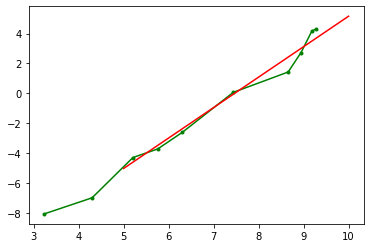

In [27]:
# Отрисуем получившуюся прямую. Используем для этого 100 точек.
p = np.linspace(5, 10, 100)
# Параметры вычисленной линии хранятся в переменной d.
yyy = p*d[1] + d[0]
plt.plot( xx, yy, 'g.-', p, yyy, 'r-');

<h3>Функция потерь</h3>
Вычисление ошибки

In [28]:
# Какая точность этого приближения?
xx[0]*d[1] + d[0], yy[0] # В даннойт точк значения вычисленные и табулированые:

(array([-8.6268456]), -8.069408937374979)

In [29]:
(xx[0]*d[1] + d[0])[0], yy[0]

(-8.626845599427643, -8.069408937374979)

In [30]:
for i in range(xx.shape[0]): # Цикл пробегает по всем нашим точкам
    print ( xx[i]*d[1] + d[0], yy[i] ) # Выводит два значения: вычисленное и табулированное.

[-8.6268456] -8.069408937374979
[-6.45571686] -6.991339495684832
[-4.60677885] -4.295605996622445
[-3.48717503] -3.725025396027754
[-2.37357447] -2.615281902030154
[-0.06534614] 0.06213166889804836
[2.42248228] 1.4259445098890027
[3.00685618] 2.726779902676676
[3.50232913] 4.181876044721179
[3.67767546] 4.29383569833885


In [31]:
xx.shape[0], len(xx) 

(10, 10)

In [32]:
def evalLine(d, x): # Создадим функцию, которая по параметрам прямой (d) считаем значение в точке (x).
    return x * d[1] + d[0]

In [33]:
evalLine( d, xx[0]) # Вычислим значение в точке.
# Значение согласуется с предыдущими результатами.

array([-8.6268456])

In [34]:
# Посчитаем среднею ошибку по всем точкам.
sum1 = 0. # Линейная ошибка.
sum2 = 0. # Квадратичная ошибка.
for i in range(xx.shape[0]):
    err = evalLine( d, xx[i]) - yy[i]
    sum1 += err
    sum2 += err * err
    print ( xx[i]*d[1] + d[0], err )
print( "integral sum = ", sum1/xx.shape[0], sum2/xx.shape[0] )

[-8.6268456] [-0.55743666]
[-6.45571686] [0.53562264]
[-4.60677885] [-0.31117285]
[-3.48717503] [0.23785036]
[-2.37357447] [0.24170744]
[-0.06534614] [-0.12747781]
[2.42248228] [0.99653777]
[3.00685618] [0.28007628]
[3.50232913] [-0.67954692]
[3.67767546] [-0.61616024]
integral sum =  [4.72955008e-15] [0.27386694]


ДЗ1 Почему сумма ошибка почти равна нулю? 

In [35]:
# Обособим данный подсчет в функцию.
# По параметрам прямой (d) и точкам (x,y) вычислим общую ошибку.

def errLineCycle(d, x, y):
    sum1 = 0.
    sum2 = 0.
    for i in range(x.shape[0]):
        err = evalLine( d, x[i]) - y[i]
        sum1 += err
        sum2 += err * err
    return sum1/x.shape[0], sum2/x.shape[0]

# А можно так. Без циклов.
def errLine(d, x, y):
    xy = zip(x, y)
    err = list(map( lambda z : evalLine( d, z[0]) - z[1], xy))
    sum1 = sum( err )
    err = np.array( err )
    sum2 = sum( err * err )
    return sum1/x.shape[0], sum2/x.shape[0]

Упр. Как ещё сильнее сократить код за счет функции mean?

In [36]:
errLine(d, xx, yy), errLineCycle(d, xx, yy)

((array([4.72955008e-15]), array([0.27386694])),
 (array([4.72955008e-15]), array([0.27386694])))

Обособим код вычисляющий линейную регрессию в функцию.

In [37]:
# x, y задают данные. На выходе параметры линейной регрессии.
def fitLin(x, y):
    sz = x.shape[0]
    A = np.concatenate( [np.ones((sz,1)), x.reshape( sz, 1) ], axis=1 )
    Ai=np.linalg.pinv(A)
    return Ai.dot( y.reshape(sz,1) )

In [38]:
d0 = fitLin( xx, yy) # Проверим, что соответсвует редыдущим результатам.
d0

array([[-15.21750468],
       [  2.03759382]])

In [39]:
errLine(d0, xx, yy)

(array([4.72955008e-15]), array([0.27386694]))

<h2>Полином</h2>

<h3>Формирование данных</h3>

In [40]:
d

array([[-15.21750468],
       [  2.03759382]])

In [41]:
# Оказывается есть функция poly.polyval,
poly.polyval(xx[0], d ) # которая умеет вычилсять значение полинома.

array([-8.6268456])

In [42]:
evalLine( d, xx[0])

array([-8.6268456])

In [43]:
xx.shape[0], x.shape[0]

(10, 10)

In [44]:
d = np.array( [-10, -28, 2.2] ) # Параметры задающие параболу.

In [45]:
n = 10
x = np.random.uniform( 3, 10, (n) )
x = np.sort( x )
x

array([3.04969018, 3.7718814 , 4.23745361, 4.31258398, 5.9266079 ,
       6.45364656, 7.72502835, 8.81156798, 8.81296998, 9.75962934])

In [46]:
y = poly.polyval(x, d ) + np.random.randn( x.shape[0] )/2

In [47]:
y

array([-74.49509   , -84.03782381, -89.93232669, -89.60529565,
       -98.85471684, -99.19718956, -95.51430164, -86.05159535,
       -85.26891754, -72.90815621])

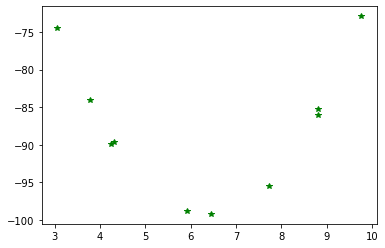

In [48]:
plt.plot( x, y, 'g*')

<h3>Регрессия второй степени</h3>

In [49]:
x_ = x.reshape(-1,1)
y_ = y.reshape(-1,1)
x_.shape, y_.shape

((10, 1), (10, 1))

In [50]:
# Создаем общую матрицу. Присваеваем её переменной A.
A = np.concatenate( [np.ones((10,1)), x_, x_**2 ], axis=1 )
A

array([[ 1.        ,  3.04969018,  9.3006102 ],
       [ 1.        ,  3.7718814 , 14.22708929],
       [ 1.        ,  4.23745361, 17.95601312],
       [ 1.        ,  4.31258398, 18.59838063],
       [ 1.        ,  5.9266079 , 35.12468124],
       [ 1.        ,  6.45364656, 41.64955396],
       [ 1.        ,  7.72502835, 59.67606297],
       [ 1.        ,  8.81156798, 77.64373029],
       [ 1.        ,  8.81296998, 77.66843994],
       [ 1.        ,  9.75962934, 95.25036494]])

In [51]:
AA = np.linalg.pinv(A)
d = AA.dot( y_ )[:,0]
d

array([ -7.24246151, -29.02417635,   2.28374247])

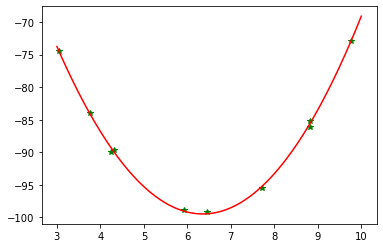

In [52]:
p = np.linspace(3, 10., 100) # Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, d ), 'r-' );

In [53]:
# Есть библиотечная функция для вычисления полиномиальной регрессии.
dd = poly.polyfit( x, y, 2 )
dd

array([ -7.24246151, -29.02417635,   2.28374247])

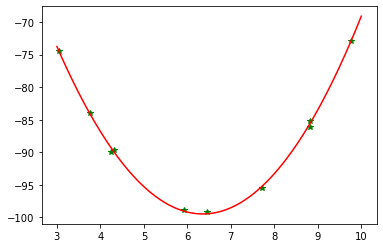

In [54]:
p = np.linspace(3, 10., 100) # Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' );

<h2>Другие степени</h2>

In [55]:
d = np.array( [-10, -28, 2.2] ) # Параметры задающие параболу.

In [56]:
n = 10
x = np.random.uniform( 3, 10, (n) )
x = np.sort( x )
x

array([3.24949356, 3.97371902, 4.20206736, 4.31462166, 4.43710669,
       6.83554076, 6.97593328, 7.75616072, 8.03239227, 8.20581321])

In [57]:
y = poly.polyval(x, d ) + np.random.randn( x.shape[0] )/2

In [58]:
y

array([-77.38023583, -85.98347369, -88.9702405 , -89.51347369,
       -91.10221937, -97.57867192, -97.88089852, -95.29567909,
       -93.33836346, -91.70531248])

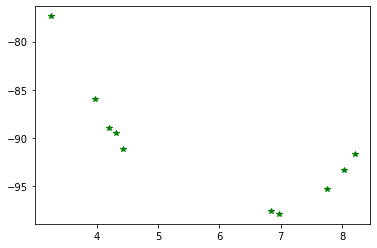

In [59]:
plt.plot( x, y, 'g*')

In [60]:
x_ = x.reshape(-1,1)
y_ = y.reshape(-1,1)
x_.shape, y_.shape

((10, 1), (10, 1))

Ручной способ

In [61]:
A = np.concatenate( [np.ones((q.shape[0],1)), x_, x_**2, x_**3, x_**4, x_**5, x_**6], axis=1 )

In [62]:
#Ai = np.linalg.pinv( A )
#dd = Ai.dot( y_ )[:,0]
#dd

AA = A.transpose().dot( A )
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
dd = AApinv.dot( y_ )[:,0]
dd

array([-1.95489728e+03,  2.20433417e+03, -1.03641020e+03,  2.50787673e+02,
       -3.31683838e+01,  2.28132069e+00, -6.38692892e-02])

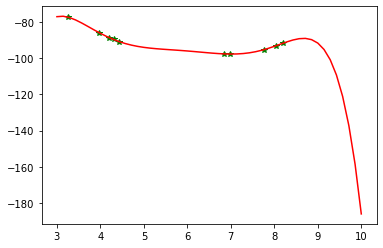

In [63]:
p = np.linspace(3., 10., 50)# Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' );
# Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

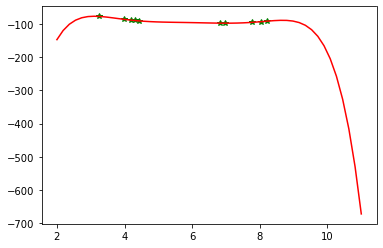

In [64]:
p = np.linspace(2., 11., 50)# Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' );
# Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

Уменьшим количество коэффициентов

In [65]:
A = np.concatenate( [np.ones((q.shape[0],1)), x_, x_**2, x_**3], axis=1 )# Нужно варировать количество степеней.

In [66]:
#Ai = np.linalg.pinv( A )
#dd = Ai.dot( y_ )[:,0]
#dd

AA = A.transpose().dot( A )
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
dd = AApinv.dot( y_ )[:,0]
dd

array([ -0.60321038, -33.62423003,   3.30350987,  -0.06880569])

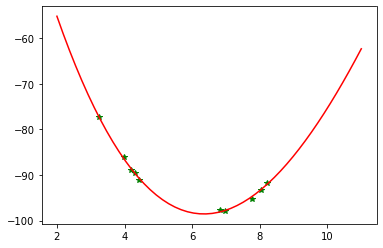

In [67]:
p = np.linspace(2, 11, 50)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' );
# Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

т.е. в зависимости от количества параметров модели качество тоже будет разным.

Как улучшить?

<h3>Стабильность</h3>

Ручной способ

<h3>Магнитуда коэффициентов</h3>

Можно ограничить диапазон значений коэффициентов, т.е. мы считаем, что коэффициенты для рассматриваемых данных не должен привывашь тысячи....а может и 100.

Для этого нужно перейти к совсем ручному вычислению псевдо обратной матрицы.

In [68]:
A = np.concatenate( [np.ones((q.shape[0],1)), x_, x_**2, x_**3, x_**4, x_**5, x_**6], axis=1 )

In [69]:
AAt = A.transpose().dot( A )

AA = AAt  + 0.01 * np.eye( AAt.shape[0] ) # Добавляем регулиризацию.
AAinv = np.linalg.inv( AA ) # Обратной матрицы может и не быть...поэтому и добавляем добавку.
AApinv = AAinv.dot( A.transpose() )
#print( A.shape, AAinv.shape, AApinv.shape )
dd = AApinv.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd, dd.shape

(array([-7.02966939e+00, -1.13595568e+01, -1.05000050e+01,  3.08061803e+00,
        -2.40894627e-01, -6.30875015e-03,  1.11521739e-03]),
 (7,))

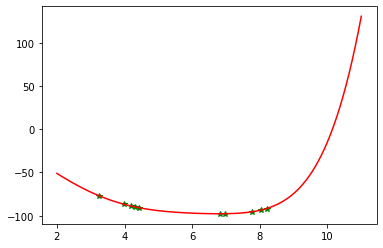

In [70]:
p = np.linspace(2, 11, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' );

Что происходит?

In [71]:
U, s, V = np.linalg.svd( AAt )
s # Собственые значения. Очень большой порядок их изменения.

array([2.40418829e+11, 1.29029183e+07, 1.70260610e+04, 1.75005926e+01,
       1.10356981e-01, 7.23100302e-05, 1.07893699e-08])

In [72]:
s = np.sqrt(s)

In [73]:
k = s[0]/s[-1] # Собственные значения отсортированы. Делим наибольшее на наименьшее.
k

4720480390.5481825

In [74]:
AA = AAt  + 0.01 * np.eye( AAt.shape[0] )
U, s, V = np.linalg.svd( AA )
s

array([2.40418829e+11, 1.29029183e+07, 1.70260710e+04, 1.75105926e+01,
       1.20356959e-01, 1.00723189e-02, 1.00000133e-02])

In [75]:
s = np.sqrt(s)

In [76]:
k_ = s[0]/s[-1] # Порядок существенно уменьшен, хотя всеравно большой. np.trace?linalg.norm
k_

4903249.019365927

In [77]:
k/k_

962.7249955904994

При полной свободе криая прошла через все точки. В данном случае точки из обучающего множества.

<h1>Коллинеарность</h1>

<h2>3х мерный график</h2>

In [78]:
%matplotlib widget

In [79]:
plt.gca(projection='3d') # Вклюаем 3хмерный режим 

theta = np.linspace(-8 * np.pi, 8 * np.pi, 200)
z = np.linspace(-2, 2, 200)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

plt.plot(x, y, z, label='parametric curve')
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<h2>Формирование данных</h2>

In [80]:
x = np.linspace(-3, 3, 50)
y = x

In [81]:
dat = zip(x, y)

In [82]:
func = lambda x, y: 0.3 + (x-0.5)**2 + (y-0.5)**2

In [83]:
z = [func(d[0], d[1]) for d in dat]

In [84]:
%matplotlib widget

In [85]:
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [86]:
xx = np.random.rand(60)*6-3
yy = xx.copy()

In [87]:
dat = list(zip(xx, yy))

In [88]:
zz = np.array([func(xy[0], xy[1]) for xy in dat])

In [89]:
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<h2>Регрессия</h2>

<h3>От двух переменных</h3>

In [90]:
xx_=xx.reshape(-1,1) # -1 дабы не указывать размер массива
yy_=yy.reshape(-1,1)
zz_=zz.reshape(-1,1)
xx_.shape, yy_.shape, zz_.shape

((60, 1), (60, 1), (60, 1))

Будем искать коэффициенты ($c, a_x, b_x, a_y, b_y$) уравнения:
    $f(x,y) = c+a_x*x+b_x*x^2+a_y*y+b_y*y^2$

In [91]:
# Создаем общую матрицу. Присваеваем её переменной A.
A = np.concatenate( [np.ones((60,1)), xx_, xx_**2, yy_, yy_**2 ], axis=1 )
A.shape

(60, 5)

In [92]:
AA = np.linalg.pinv(A)
AA.shape

(5, 60)

In [93]:
# Теперь её используем для решения системы.
d = AA.dot( zz_ )
d # В общем параметры приблизительно правельные.

array([[ 0.8],
       [-1. ],
       [ 1. ],
       [-1. ],
       [ 1. ]])

In [94]:
d = d[:,0]

In [95]:
print(f'f(x,y) = {d[0]:0.2} + {d[1]:0.2}*x+{d[2]:0.2}*x^2+{d[3]:0.2}*y+{d[4]:0.2}*y^2')

f(x,y) = 0.8 + -1.0*x+1.0*x^2+-1.0*y+1.0*y^2


In [96]:
reg_func = lambda x, y: d[0] + d[1]*x+d[2]*x**2 + d[3]*y+d[4]*y**2

In [97]:
zz_new = np.array([reg_func(xy[0], xy[1]) for xy in dat])

In [98]:
xx.shape, yy.shape, zz_new.shape

((60,), (60,), (60,))

In [99]:
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz_new, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [100]:
d

array([ 0.8, -1. ,  1. , -1. ,  1. ])

In [101]:
d += np.array([0, 1, 1, -1, -1])
d

array([ 8.00000000e-01, -4.44089210e-16,  2.00000000e+00, -2.00000000e+00,
       -7.43849426e-15])

In [102]:
zz_new2 = np.array([reg_func(xy[0], xy[1]) for xy in dat])

In [103]:
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz_new2, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [104]:
np.allclose( zz_new, zz_new2 )

True

Как так? Регрессия неоднозначна!

<b>Про неоднозначность псевдо обратной матрицы</b>

Мы использовали pinv. Данная функция скрывает факт наличия других решений.

In [105]:
Avir = np.random.uniform( 0.1, 2, (3, 3) )
Avir[:,0] = 0., 0., 0.
invAvir = alg.pinv(Avir)
invAvir

array([[ 0.        ,  0.        ,  0.        ],
       [-0.15242355,  0.11482007,  0.73641169],
       [ 0.58347273,  0.06412577, -0.53327552]])

In [106]:
ans = invAvir.dot( np.array([.1, 15, -15]) )
ans

array([ 0.        , -9.33911657,  9.01936659])

In [107]:
Avir.dot( ans )

array([  5.06629319,  -0.95352497, -11.48462272])

In [108]:
Avir.dot( ans+np.array([1.5,0,0]))

array([  5.06629319,  -0.95352497, -11.48462272])

<h3>Неоднозначность задание функции</h3>

In [109]:
func2 = lambda x, y: 0.3 + 2*(x-0.5)**2
zz2 = [func2(xy[0], xy[1]) for xy in dat]

In [110]:
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz2, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [111]:
np.allclose( zz2, zz)

True

In [112]:
func3 = lambda x, y: 0.3 + 0.5*(x-0.5)**2 + 1.5*(y-0.5)**2
zz3 = np.array([func3(d[0], d[1]) for d in dat])

In [113]:
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz3, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Как же так получилось? Почему обратная матрица вычислилась?

<h3>Вырожденность</h3>

Изучим найденную обратную матрицу 

In [114]:
with np.printoptions(precision=3, suppress=True):
    print(AA[0][:10])#0
    print(AA[1][:10])#1
    print(AA[2][:10])#2
    print(AA[3][:10])#1
    print(AA[4][:10])#2

[0.031 0.012 0.031 0.019 0.025 0.015 0.008 0.03  0.01  0.004]
[ 0.001 -0.005  0.001 -0.004 -0.003  0.009  0.011 -0.001 -0.005 -0.006]
[-0.003  0.    -0.003 -0.001 -0.002  0.002  0.004 -0.003  0.001  0.002]
[ 0.001 -0.005  0.001 -0.004 -0.003  0.009  0.011 -0.001 -0.005 -0.006]
[-0.003  0.    -0.003 -0.001 -0.002  0.002  0.004 -0.003  0.001  0.002]


<b>SVD</b>

In [115]:
a = np.array( [ [1, -2], [1, -2] ] )
U, s, V = np.linalg.svd(a, full_matrices=True)
U.shape, V.shape, s.shape

((2, 2), (2, 2), (2,))

In [116]:
print( U )
print( V )
print( s )

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]
[3.16227766e+00 4.24340278e-17]


In [117]:
S = np.diag( s )

In [118]:
np.allclose(a, np.dot(U, np.dot(S, V)))

True

Продолжим...

In [119]:
u, s, v = alg.svd(A)
s

array([3.66447594e+01, 1.57037283e+01, 5.58155937e+00, 6.97430523e-15,
       3.51635957e-15])

In [120]:
u.shape, v.shape

((60, 60), (5, 5))

Будем искать обратную матрицу

In [121]:
1/s

array([2.72890317e-02, 6.36791457e-02, 1.79161402e-01, 1.43383458e+14,
       2.84385024e+14])

In [122]:
dd = np.zeros(u.shape[0])# Из-за размера матрицы u
dd[:5] = 1/s
D = np.diag(dd)
D.shape

(60, 60)

In [123]:
D = D[:5,:]

In [124]:
Du = D.dot(u.transpose())
Du.shape

(5, 60)

In [125]:
with np.printoptions(precision=3, suppress=True):
    print(Du[0][:10])#0
    print(Du[1][:10])#1
    print(Du[2][:10])#2
    print(Du[3][:10])#1
    print(Du[4][:10])#2

[0.    0.003 0.    0.002 0.001 0.003 0.004 0.    0.003 0.004]
[ 0.     0.007 -0.     0.006  0.005 -0.013 -0.015  0.002  0.007  0.008]
[-0.032 -0.011 -0.032 -0.019 -0.025 -0.015 -0.008 -0.03  -0.009 -0.004]
[ 1.879e+13  1.775e+13 -1.373e+14  2.066e+12  2.773e+12  6.653e+11
  6.800e+11  3.322e+12  2.014e+12  4.192e+11]
[ 3.813e+13 -2.750e+14 -2.689e+13  8.770e+12  5.783e+12 -9.705e+12
 -4.337e+12  3.858e+12  3.726e+12  1.708e+13]


In [126]:
v# Внимание на столбцы!

array([[ 0.14794629, -0.09887429,  0.69230038, -0.09887429,  0.69230038],
       [ 0.02511559, -0.69940228, -0.10257222, -0.69940228, -0.10257222],
       [-0.98867644, -0.03256271,  0.10099068, -0.03256271,  0.10099068],
       [-0.        , -0.03808492, -0.70608041,  0.03808492,  0.70608041],
       [ 0.        ,  0.70608041, -0.03808492, -0.70608041,  0.03808492]])

In [127]:
invA = v.transpose().dot(Du)

In [128]:
d = invA.dot(zz)
d

array([ 0.8    , -0.25   ,  0.53125, -1.5    ,  1.5    ])

In [129]:
d[1] + d[3], d[2] + d[4]

(-1.75, 2.03125)

In [130]:
d += np.array([0, 1, 1, -1, -1])
d

array([ 0.8    ,  0.75   ,  1.53125, -2.5    ,  0.5    ])

In [131]:
zz_new2 = np.array([reg_func(d[0], d[1]) for d in dat])

In [132]:
d[1] + d[3], d[2] + d[4]

(-1.75, 2.03125)

In [133]:
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz_new2, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Ответов много. Значит нужно как-то выбрать один.

<h2>Регуляризация</h2>

<h3>Ответ не стабилен</h3>

In [134]:
def gen_data():
    xx = np.random.rand(60)*6-3
    yy = xx.copy()
    dat = list(zip(xx, yy))
    func = lambda x, y: 0.3 + (x-0.5)**2 + (y-0.5)**2
    zz = np.array([func(xy[0], xy[1]) for xy in dat])
    return xx, yy, zz

In [135]:
def get_inv(A):
    u, s, v = alg.svd(A)
    dd = np.zeros(u.shape[0])# Из-за размера матрицы u
    dd[:5] = 1/s
    D = np.diag(dd)
    D = D[:5,:]
    Du = D.dot(u.transpose())#[:5,:]
    invA = v.transpose().dot(Du)
    return invA

In [136]:
xx, yy, zz = gen_data()

# Создаем общую матрицу. Присваеваем её переменной A.
xx_=xx.reshape(-1,1) # -1 дабы не указывать размер массива
yy_=yy.reshape(-1,1)
zz_=zz.reshape(-1,1)
A = np.concatenate( [np.ones((60,1)), xx_, xx_**2, yy_, yy_**2 ], axis=1 )

invA = get_inv(A)
#invA = alg.pinv(A)
d = invA.dot( zz_ )
d = d[:,0]
d

array([ 0.8, -0.5,  6. , -1. , -2. ])

In [137]:
d[1] + d[3], d[2] + d[4]

(-1.5, 4.0)

In [138]:
dat = list(zip(xx, yy))
zz_check = np.array([reg_func(xy[0], xy[1]) for xy in dat])
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz_check, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<h3>Зануляем большие значения</h3>

Повтор за библиотечной функцией.

In [139]:
u, s, v = alg.svd(A)

In [140]:
s

array([4.13737200e+01, 1.77190243e+01, 5.20256256e+00, 1.35995103e-15,
       6.36616350e-16])

In [141]:
dd = np.zeros(u.shape[0])# Из-за размера матрицы u
dd[:5] = 1/s

In [142]:
dd

array([2.41699320e-02, 5.64365160e-02, 1.92212970e-01, 7.35320595e+14,
       1.57080477e+15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [143]:
dd[:8]

array([2.41699320e-02, 5.64365160e-02, 1.92212970e-01, 7.35320595e+14,
       1.57080477e+15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Принудительно обнуляем большие собственные значения.

In [144]:
dd[3:5] = 0. # Обнуляем максимальное собственное значение.

In [145]:
D = np.diag(dd)
D = D[:5,:]
D.shape

(5, 60)

In [146]:
Du = D.dot(u.transpose())

In [147]:
with np.printoptions(precision=3, suppress=True):
    print(u[0][:10])#0
    print(u[1][:10])#1
    print(u[2][:10])#2
    print(u[3][:10])#1
    print(u[4][:10])#2
    print(u[5][:10])#2
    print(u[6][:10])#2

[ 0.173 -0.225  0.02  -0.06  -0.082 -0.107 -0.075 -0.092 -0.221 -0.074]
[ 0.061  0.086 -0.133 -0.19   0.757 -0.021 -0.06   0.053  0.098  0.071]
[ 0.031  0.061 -0.165  0.681 -0.003 -0.119 -0.072  0.1    0.097 -0.093]
[ 0.294  0.162  0.121 -0.152  0.127  0.051 -0.036 -0.291  0.033 -0.203]
[ 0.017  0.042 -0.179 -0.059 -0.056 -0.051 -0.117 -0.093  0.08  -0.033]
[ 0.01  -0.044 -0.179  0.053 -0.004  0.973 -0.016  0.009 -0.015 -0.014]
[ 0.036  0.066 -0.16  -0.037 -0.01  -0.025  0.972 -0.012  0.005 -0.021]


In [148]:
Du = D.dot(u.transpose())
Du.shape

(5, 60)

In [149]:
invA = v.transpose().dot(Du)
invA.shape

(5, 60)

In [150]:
d = invA.dot( zz_ )
d

array([[ 0.8],
       [-1. ],
       [ 1. ],
       [-1. ],
       [ 1. ]])

Bingo. Есть совпадение.

In [151]:
def get_inv2(A):
    u, s, v = alg.svd(A)
    dd = np.zeros(u.shape[0])# Из-за размера матрицы u
    dd[:5] = 1/s
    dd[3:5] = 0.
    D = np.diag(dd)
    D = D[:5,:]
    Du = D.dot(u.transpose())#[:5,:]
    invA = v.transpose().dot(Du)
    return invA

In [152]:
xx, yy, zz = gen_data()

# Создаем общую матрицу. Присваеваем её переменной A.
xx_=xx.reshape(-1,1) # -1 дабы не указывать размер массива
yy_=yy.reshape(-1,1)
zz_=zz.reshape(-1,1)
A = np.concatenate( [np.ones((60,1)), xx_, xx_**2, yy_, yy_**2 ], axis=1 )

invA = get_inv2(A)
#invA = alg.pinv(A)
d = invA.dot( zz_ )
d = d[:,0]
d

array([ 0.8, -1. ,  1. , -1. ,  1. ])

In [153]:
d[1] + d[3], d[2] + d[4]

(-1.9999999999999998, 1.9999999999999976)

Ответ идеален.

In [154]:
dat = list(zip(xx, yy))
zz_check = np.array([reg_func(xy[0], xy[1]) for xy in dat])
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz_check, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

через саму матрицу путем уменьшения количества коэффициентов

...Упражнение?

<h3>Чуть увеличиваем маленькие</h3>

In [155]:
u, s, v = alg.svd(A)

In [156]:
s

array([4.55126569e+01, 1.92328396e+01, 4.94603141e+00, 4.92257468e-15,
       8.29949980e-16])

In [157]:
s += 0.000001

In [158]:
dd = np.zeros(u.shape[0])# Из-за размера матрицы u
dd[:5] = 1/s
D = np.diag(dd[:5])
Du = D.dot(u[:,:5].transpose())
invA = v.transpose().dot(Du)

In [159]:
d = invA.dot( zz_ )
d

array([[ 0.79999988],
       [-0.99999995],
       [ 0.99999998],
       [-0.99999995],
       [ 0.99999999]])

In [160]:
def get_inv3(A):
    u, s, v = alg.svd(A)
    dd = np.zeros(u.shape[0])# Из-за размера матрицы u
    s += 0.000001
    dd[:5] = 1/s
    D = np.diag(dd)
    D = D[:5,:]
    Du = D.dot(u.transpose())#[:5,:]
    invA = v.transpose().dot(Du)
    return invA

In [161]:
xx, yy, zz = gen_data()

# Создаем общую матрицу. Присваеваем её переменной A.
xx_=xx.reshape(-1,1) # -1 дабы не указывать размер массива
yy_=yy.reshape(-1,1)
zz_=zz.reshape(-1,1)
A = np.concatenate( [np.ones((60,1)), xx_, xx_**2, yy_, yy_**2 ], axis=1 )

invA = get_inv3(A)
#invA = alg.pinv(A)
d = invA.dot( zz_ )
d = d[:,0]
d

array([ 0.79999988, -0.99999994,  0.99999999, -0.99999995,  0.99999998])

In [162]:
d[1] + d[3], d[2] + d[4]

(-1.9999998919665813, 1.999999970663339)

Ответ идеален.

In [163]:
dat = list(zip(xx, yy))
zz_check = np.array([reg_func(xy[0], xy[1]) for xy in dat])
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz_check, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Но можно и через саму матрицу A

In [164]:
A.shape

(60, 5)

In [165]:
AA = A.transpose().dot( A )
AA = AA  + 0.000001 * np.eye( AA.shape[0] ) # Добавляем регулиризацию. 150
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )

In [166]:
invA = AApinv
#invA = alg.pinv(A)
d = invA.dot( zz_ )
d = d[:,0]
d

array([ 0.7999994 , -1.00000002,  1.00000016, -1.        ,  0.99999993])

In [167]:
dat = list(zip(xx, yy))
zz_check = np.array([reg_func(xy[0], xy[1]) for xy in dat])
%matplotlib widget
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, label='parametric curve')
plt.plot(xx, yy, zz_check, ".")
plt.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<h1>Обучение и проверка</h1>
Learn and Test

In [168]:
x = np.random.uniform( 3, 10, 10 ) # 10 точек на отрезке [3, 10]
y = x * 2 - 15 # Вычисляем значение в каждой из точек. Функция линейная.

xx = np.sort( x ) # Дело в том, что необходимо отсортировать числа по оси x.
yy = xx * 2 - 15 + np.random.randn(10) # Теперь заново вычисляем.

yy.shape, x.shape # Массивы соответсвуют друг другу по размеру.

((10,), (10,))

In [169]:
%matplotlib inline

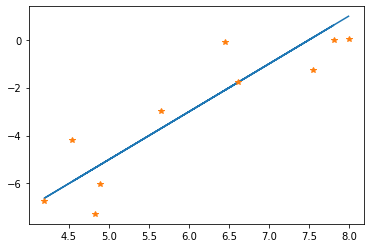

In [170]:
plt.plot( x, y, '-' )
plt.plot( xx, yy, '*' )

<h2>Случайная выборка</h2>

In [171]:
perm = np.random.permutation( xx.shape[0] ) # Создаем перестановку числе от 0 до xx.shape[0] не включительно.
perm

array([3, 6, 2, 5, 4, 8, 9, 0, 1, 7])

In [172]:
#np.random.randint(0, xx.shape[0], 5)
ii = perm[:5] # Берем первые 5 чисел.
ii

array([3, 6, 2, 5, 4])

In [173]:
# Вычисляем параметры линейной регрессии для подмножества числе (ii)
d1 = fitLin( xx[ii], yy[ii])
d1

array([[-22.65445923],
       [  3.34688146]])

In [174]:
# Вычисляем ошибку на подмножестве.
ee = errLine(d1, xx[ii], yy[ii])
ee

(array([9.81437154e-15]), array([0.7474497]))

In [175]:
jj=perm[5:]

In [176]:
errLine(d1, xx[jj], yy[jj]) # Вычисляем ошибку на всем множестве точек.

(array([1.2472223]), array([11.58547636]))

In [177]:
def experimentLin(n, d, p, k ):
    x = np.random.uniform( 3, 10, (n) )
    y = d[1] * x + d[0] + np.random.randn( x.shape[0] )/2
    d0 = fitLin( x, y)
    e0 = errLine(d0, x, y)
    
    ee10 = np.array([0.])
    ee11 = np.array([0.])
    for j in range(k):
        perm = np.random.permutation( x.shape[0] )
        ii = perm[:int(x.shape[0] * p)]#np.random.randint(0, x.shape[0], int(x.shape[0] * p) )
        #print(ii)
        d1 = fitLin( x[ii], y[ii])
        e1 = errLine(d1, x, y)
        ee10 += e1[0]
        ee11 += e1[1]
    print( e0, [ee10 / k, ee11 / k] )

In [178]:
experimentLin(10, np.array([-15, 2.5]), 0.85, 1000)

(array([-1.39888101e-15]), array([0.21890523])) [array([0.00702908]), array([0.23319056])]


ДЗ2: Построить статистику для ошибки.

Возможно интересные куски кода

In [179]:
#Свободу модули нужно как-то регулировать.
#Количество параметров

#Ручной режим
#Решим эту же задачу вручную.

In [180]:
# optimze gradient

In [181]:
...

Ellipsis

In [182]:
#AApinv2, residuals, rank, s= np.linalg.lstsq( A, y )
#AApinv2

In [183]:
#AApinv2.shape, A.shape, y.shape

In [184]:
#residuals, rank # Сумма ошибок отклонения. И ранг.

In [185]:
## Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

In [186]:
#Вырезаем не нуденвые два стобца из матрицы A (которая 3 на 3)
#A2 = A[:,1:]
#A2

In [187]:
#invA2 = alg.pinv(A2)
#invA2

In [188]:
#x = invA2.dot(y)
#x

In [189]:
#A2.dot(x)#Ответ совпадает с исходной матрицей 3 на 3

In [190]:
#A.dot([0,x[0], x[1]])